# K Nearest Neighbors Project 

This will be a simple project where I will build a K nearest neighbors model. I will work with anonymized data. Meaning, I am not aware of what the columns or values represent.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data
I will be reading the 'KNN_Project_Data' csv file into a dataframe named df.

In [2]:
df = pd.read_csv("KNN_Project_Data")
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [4]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


# EDA

Since this data is artificial, I will just do a large pairplot with seaborn. I will use the hue to indicate the TARGET CLASS column.

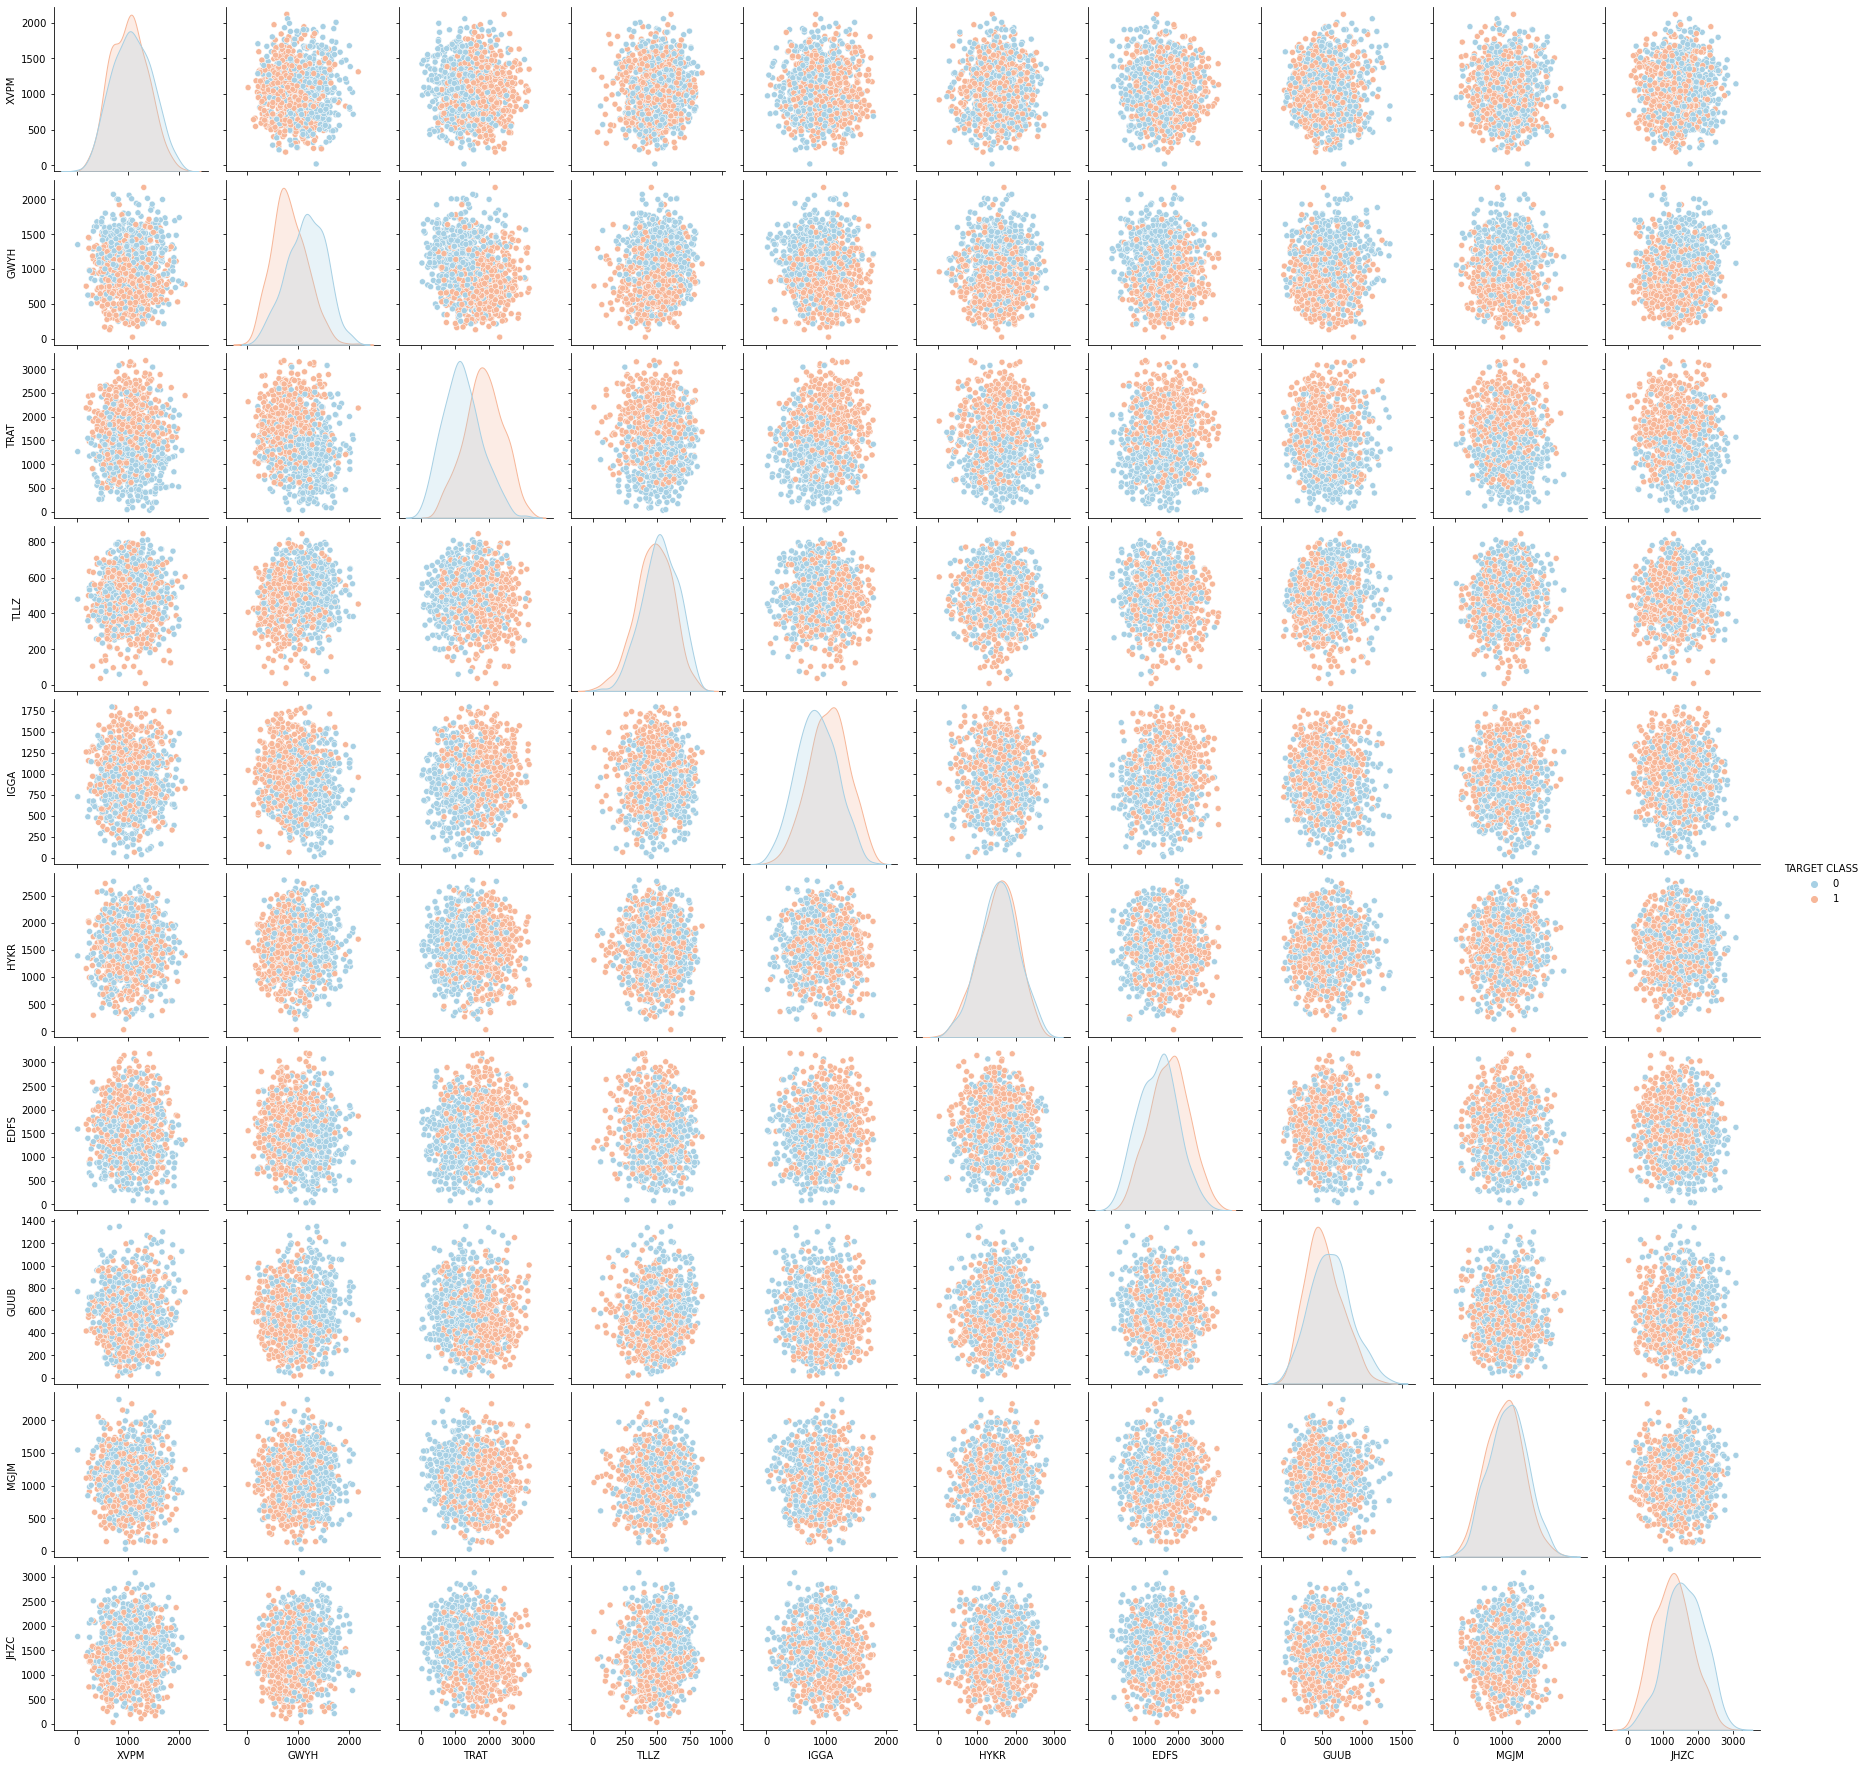

In [5]:
sns.pairplot(data=df, hue="TARGET CLASS", palette="RdBu_r")

There seems to be decent separation between both classes in the TRAT column against the other columns.

# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(labels="TARGET CLASS",axis=1)
X

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792
...,...,...,...,...,...,...,...,...,...,...
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020


In [8]:
y = df["TARGET CLASS"]
y.head(3)

0    0
1    1
2    1
Name: TARGET CLASS, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [39]:
X_train

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
473,1426.957666,595.843689,918.178458,652.826244,1343.125776,1065.138219,1890.189085,780.456358,1544.783045,2118.867280
815,678.487162,1323.011906,1840.815056,557.628346,709.698294,1505.054588,2402.057814,155.732885,1561.464269,1309.548104
120,1034.969456,703.074532,1815.755137,689.599772,666.677615,573.217462,1209.432816,347.999523,1138.240271,1261.432377
497,1193.534026,825.001621,1071.956766,737.626529,705.232569,1060.893586,1695.418701,483.971142,701.370820,1830.159336
279,1003.976882,1455.386464,1138.638580,538.943265,1384.230342,1606.119052,1662.698832,502.470730,458.655001,586.017721
...,...,...,...,...,...,...,...,...,...,...
649,1159.659595,358.274559,2653.094336,630.558840,991.019537,1717.696188,1808.268772,560.763379,1061.138914,1750.779353
827,770.576781,1048.517658,924.685514,501.709561,1001.178163,1939.218802,1451.036589,431.892564,1541.269655,177.140101
614,1007.708875,1134.938591,1801.986926,428.470840,1281.772929,605.995013,1645.343172,614.796591,137.657046,1732.378967
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912


In [40]:
X_test

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
305,1167.273872,634.341567,2937.577565,632.331269,672.211040,1354.313958,1957.756882,593.521134,1274.817673,909.927444
383,1005.941506,1404.288540,634.665875,464.921219,262.512273,930.861214,1858.945741,432.913596,1504.647965,1026.345191
395,629.077057,710.212244,664.936531,600.053761,815.034867,949.849501,935.542253,754.724612,1458.762658,779.453822
775,1553.370966,1708.830005,198.681994,573.214860,940.519674,1200.196889,1789.856896,732.195668,1295.141146,1545.750580
43,828.206454,1339.697957,265.903079,361.557510,1227.674733,1666.571282,653.990170,569.496395,769.238352,1269.425848
...,...,...,...,...,...,...,...,...,...,...
731,1124.483404,1063.934792,2616.920474,659.258452,743.797759,1886.518769,1964.546970,391.776994,714.633690,1158.742698
463,1133.556497,1374.838382,948.883865,571.054068,609.218193,2409.985246,1289.323108,477.702741,1826.117063,1731.986402
364,710.239037,1733.139221,1122.041763,438.328248,1256.519723,1884.068935,2049.566197,266.883887,1437.770237,1859.162416
297,485.824455,998.989957,1697.372304,278.718674,828.888889,2143.602509,548.302142,431.114326,759.908043,1473.176477


In [41]:
y_train

473    0
815    0
120    1
497    0
279    0
      ..
649    1
827    0
614    1
997    1
240    0
Name: TARGET CLASS, Length: 700, dtype: int64

In [42]:
y_test

305    1
383    0
395    0
775    0
43     0
      ..
731    1
463    0
364    0
297    0
3      0
Name: TARGET CLASS, Length: 300, dtype: int64

# Standardize the variables

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
scaler.fit(X_train)

StandardScaler()

In [46]:
X_train = scaler.transform(X_train)
X_train

array([[ 0.97312801, -0.99755916, -0.98084271, ...,  0.8577642 ,
         1.19706782,  1.13742526],
       [-0.99842698,  0.86723773,  0.47409584, ..., -1.62588745,
         1.23946295, -0.27119607],
       [-0.05941276, -0.72256949,  0.43457795, ..., -0.86151189,
         0.16384435, -0.35494157],
       ...,
       [-0.13122018,  0.38493044,  0.41286637, ...,  0.19916696,
        -2.37912565,  0.46474173],
       [-0.35700058, -0.96639268,  0.82838198, ..., -1.50216   ,
        -0.24253996,  0.83185868],
       [ 0.15924499,  1.34782603, -0.86480866, ..., -0.66635351,
         0.83056782, -1.90484756]])

In [47]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.28909186, -0.89883272,  2.20361974, ...,  0.11458422,
         0.51095414, -0.96673648],
       [-0.13587563,  1.07566875, -1.42792381, ..., -0.52392737,
         1.09506501, -0.7641112 ],
       [-1.12857872, -0.70426509, -1.38018894, ...,  0.75546503,
         0.97844806, -1.19382603],
       ...,
       [-0.91478899,  1.91899457, -0.6593634 , ..., -1.18399535,
         0.92509608,  0.68540853],
       [-1.50592209,  0.03629503,  0.24789584, ..., -0.53108055,
        -0.79768237,  0.01359938],
       [ 0.00480184,  0.21036179, -1.46366638, ..., -0.88669629,
         0.20489216, -0.02511133]])

In [48]:
df.columns[:-1]

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC'],
      dtype='object')

In [49]:
df_feat = pd.DataFrame(data=X_train,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,0.973128,-0.997559,-0.980843,1.103894,1.122714,-0.973439,0.584689,0.857764,1.197068,1.137425
1,-0.998427,0.867238,0.474096,0.441154,-0.694138,-0.069926,1.451832,-1.625887,1.239463,-0.271196
2,-0.059413,-0.722569,0.434578,1.359901,-0.817534,-1.983761,-0.568562,-0.861512,0.163844,-0.354942
3,0.358264,-0.409892,-0.738344,1.694249,-0.706947,-0.982157,0.254734,-0.320943,-0.946454,0.634929
4,-0.141051,1.206708,-0.633191,0.311074,1.240614,0.137643,0.199304,-0.247396,-1.563313,-1.530502


# KNN

I will begin with n_neighbors = 1.

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=1)

In [52]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations

In [53]:
predictions = knn.predict(X_test)
predictions

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0], d

In [54]:
y_test

305    1
383    0
395    0
775    0
43     0
      ..
731    1
463    0
364    0
297    0
3      0
Name: TARGET CLASS, Length: 300, dtype: int64

In [55]:
y_test != predictions

305    False
383    False
395     True
775    False
43      True
       ...  
731    False
463    False
364     True
297    False
3      False
Name: TARGET CLASS, Length: 300, dtype: bool

In [56]:
np.mean(y_test != predictions)

0.23333333333333334

In [57]:
# correct percentage:
np.mean(y_test == predictions)

0.7666666666666667

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       154
           1       0.76      0.76      0.76       146

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [60]:
confusion_matrix(y_test,predictions)

array([[119,  35],
       [ 35, 111]], dtype=int64)

with n_neighbors=1, the evaluating parameters are not the best.

# Choosing a K Value
Now I will use the elbow method to pick a good K Value.

I will create a for loop that trains various KNN models with different k values, then keep track of the error rate for each of these models with a list.

In [61]:
error_list = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_list.append(np.mean(y_test != pred))
error_list

[0.23333333333333334,
 0.22333333333333333,
 0.21333333333333335,
 0.21333333333333335,
 0.20666666666666667,
 0.18,
 0.19666666666666666,
 0.19333333333333333,
 0.19666666666666666,
 0.18,
 0.17333333333333334,
 0.18333333333333332,
 0.16666666666666666,
 0.16666666666666666,
 0.18666666666666668,
 0.16333333333333333,
 0.16666666666666666,
 0.17,
 0.17333333333333334,
 0.17333333333333334,
 0.18,
 0.16666666666666666,
 0.18333333333333332,
 0.17666666666666667,
 0.16666666666666666,
 0.15666666666666668,
 0.17,
 0.17333333333333334,
 0.17666666666666667,
 0.16666666666666666,
 0.16666666666666666,
 0.16,
 0.16666666666666666,
 0.16,
 0.17,
 0.17333333333333334,
 0.17,
 0.16666666666666666,
 0.17333333333333334]

Now I will create a plot using the information from the for loop.

Text(0, 0.5, 'Error Rate')

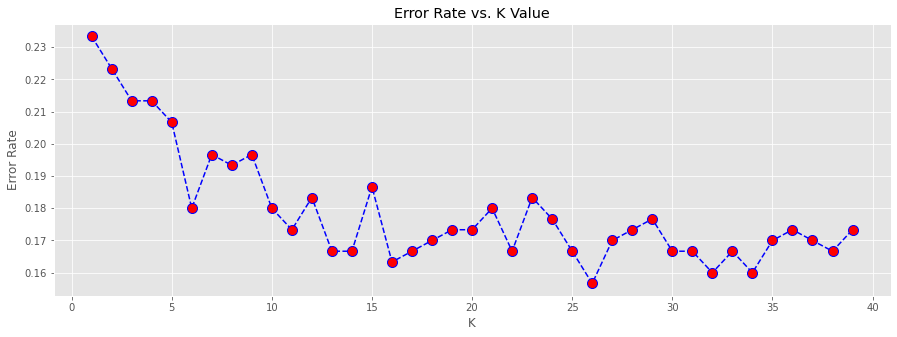

In [62]:
plt.style.use("ggplot")
plt.figure(figsize=(15,5))
plt.plot(range(1,40),error_list,ls="--", c="blue",marker="o",mfc="red",ms=10.0)

plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

The error rate seems to decrease as a larger k value is selected. Because of this, I will now chose a k value of 26.

## Retrain model with new K Value

In [63]:
knn = KNeighborsClassifier(n_neighbors=26)

In [64]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=26)

In [65]:
pred31 = knn.predict(X_test)
pred31

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0], d

In [66]:
print(confusion_matrix(y_test,pred31))
print("\n")
print(classification_report(y_test,pred31))

[[127  27]
 [ 20 126]]


              precision    recall  f1-score   support

           0       0.86      0.82      0.84       154
           1       0.82      0.86      0.84       146

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



The precision, recall, f1-score and accuracy were increased by about 5-8% just by selecting a k value of 31.